# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [37]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [38]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [ ]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [69]:
# Bring over functions defined in Rental Analysis
sfo_data_year = sfo_data["housing_units"]
sfo_data_year_grp = sfo_data_year.sort_values()
sfo_avg = sfo_data_year_grp.groupby('year').mean()
sfo_group = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_group_avg = sfo_group.groupby(['neighborhood']).mean()
sfo_group_avg_plt = sfo_group_avg.sort_values('sale_price_sqr_foot', ascending=False)
df_neighborhood_locations_avg = df_neighborhood_locations.groupby(['Neighborhood']).mean()
joined_df = pd.concat([df_neighborhood_locations_avg, sfo_group_avg], axis='columns', join='inner')

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [70]:
# Define Panel Visualization Functions
def housing_units_per_year():
    housing_units_per_year = sfo_data.groupby('year')['housing_units'].mean().hvplot.bar(xlabel="Year", ylabel="Housing Units",ylim=(370000,390000), title="Housing Units Per Year")
return housing_units_per_year

<function __main__.async-def-wrapper.<locals>.housing_units_per_year()>

In [71]:
def average_gross_rent():
    average_gross_rent = sfo_data.groupby('year')['gross_rent'].mean().hvplot.line(xlabel='Year', ylabel='Gross Rent', title='Average Gross Rent in San Francisco')
return average_gross_rent

<function __main__.async-def-wrapper.<locals>.average_gross_rent()>

In [72]:
def average_sales_price():
    """Average Sales Price Per Year."""
    average_sales_price = sfo_data.groupby('year')['sale_price_sqr_foot'].mean().hvplot.line(xlabel='Year', ylabel='Average Sales Price', title='Average Sale Price Per Year')
return average_sales_price

<function __main__.async-def-wrapper.<locals>.average_sales_price()>

In [79]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    average_price_by_neighborhood = sfo_group_avg.hvplot.line(x='year', y='sale_price_sqr_foot', groupby='neighborhood')
return average_price_by_neighborhood

<function __main__.async-def-wrapper.<locals>.average_price_by_neighborhood()>

In [80]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top_most_expensive_neighborhoods = sfo_group_avg_plt.head(10).plot(kind='bar', y='sale_price_sqr_foot', title="Top 10 Most Expensive Neighborhoods.")
return top_most_expensive_neighborhoods

<function __main__.async-def-wrapper.<locals>.top_most_expensive_neighborhoods()>

In [81]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    parallel_coordinates = px.parallel_coordinates(sfo_group_avg_plt, color='sale_price_sqr_foot', title="Parallel Coordinates Plot.")
return parallel_coordinates

<function __main__.async-def-wrapper.<locals>.parallel_coordinates()>

In [82]:
def parallel_categories():
    """Parallel Categories Plot."""
    parallel_categories = px.parallel_categories(
    sfo_group_avg_plt,
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Sale Price/sqft",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)
return parallel_categories

<function __main__.async-def-wrapper.<locals>.parallel_categories()>

In [83]:
def neighborhood_map():
    """Neighborhood Map"""
    neighborhood_map = px.scatter_mapbox(joined_df, lat="Lat", lon="Lon", size="gross_rent", color="gross_rent")
return neighborhood_map

<function __main__.async-def-wrapper.<locals>.neighborhood_map()>

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Str(None, name='Housing Units per Year')
    [1] Str(None, name='Average Gross Rent')
    [2] Str(None, name='Average Price b...)
    [3] Str(None, name='Most Expensive N...)
    [4] Str(None, name='Parallel Coordinates')
    [5] Str(None, name='Parallel Categories')
    [6] Str(None, name='Neighborhood Map')

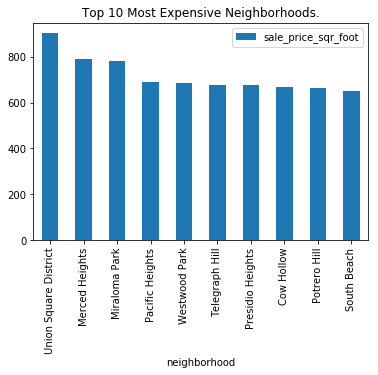

In [91]:
sfo_dashboard = pn.Tabs(
    ("Housing Units per Year", housing_units_per_year()),
    ("Average Gross Rent", average_gross_rent()),
    ("Average Price by Neighborhood", average_price_by_neighborhood()),
    ("Most Expensive Neighborhoods", top_most_expensive_neighborhoods()),
    ("Parallel Coordinates", parallel_coordinates()),
    ("Parallel Categories", parallel_categories()),
    ("Neighborhood Map", neighborhood_map()))
sfo_dashboard

## Serve the Panel Dashboard

In [92]:
sfo_dashboard.servable()

Tabs
    [0] Str(None, name='Housing Units per Year')
    [1] Str(None, name='Average Gross Rent')
    [2] Str(None, name='Average Price b...)
    [3] Str(None, name='Most Expensive N...)
    [4] Str(None, name='Parallel Coordinates')
    [5] Str(None, name='Parallel Categories')
    [6] Str(None, name='Neighborhood Map')